# Prova Dati Lavarone Chiesa - 2019-03-21

## Metodo della massima verosimiglianza

Matteo Franzoi - 2019-03-21

---

In [9]:
import os
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime
from scipy.stats import genextreme, gumbel_r
from numpy import linspace
import numpy as np

In [10]:
os.getcwd()

'/media/Dati/jupyter/prova'

In [11]:
os.listdir()

['.ipynb_checkpoints',
 'abs_m',
 'Coordinate.csv',
 'mleLavarone20190321.ipynb',
 'momentiLavarone20190321.ipynb',
 'prova_coordinate.ipynb',
 'prova_gaussiana.ipynb',
 't0032.csv',
 'Untitled.ipynb',
 'voti.ipynb',
 'voti.xlsx']

In [14]:
data = pd.read_csv('t0032.csv')
map(datetime, data['anno'])
data = data.set_index('anno')
data

,totale
anno,
1992,1441.8
1993,1380.4
1994,1251.8
1995,944.4
1996,1375.4
1997,821.6
1998,NaN
1999,1292.0
2000,1451.6


In [15]:
data['totale']

anno
1992    1441.8
1993    1380.4
1994    1251.8
1995     944.4
1996    1375.4
1997     821.6
1998       NaN
1999    1292.0
2000    1451.6
2001    1177.2
2002       NaN
2003       NaN
2004       NaN
2005     824.0
2006     938.2
2007       NaN
2008       NaN
2009       NaN
2010       NaN
2011    1075.4
2012       NaN
2013    1644.4
2014    2100.6
2015     864.8
2016    1187.8
2017    1039.6
2018    1666.8
2019       NaN
Name: totale, dtype: float64

In [16]:
samp = data['totale'].dropna()
param = gumbel_r.fit(samp)
param

(1096.2225247665276, 260.78733512901965)

In [20]:
abs_mle = pd.DataFrame([
    param],
    columns = ['a', 'b'],
    index = ['totale']    
).T
abs_mle

,totale
a,1096.222525
b,260.787335


In [22]:
abs_mle.to_pickle('abs_mle')

In [23]:
os.listdir()

['.ipynb_checkpoints',
 'abs_m',
 'abs_mle',
 'Coordinate.csv',
 'mleLavarone20190321.ipynb',
 'momentiLavarone20190321.ipynb',
 'prova_coordinate.ipynb',
 'prova_gaussiana.ipynb',
 't0032.csv',
 'Untitled.ipynb',
 'voti.ipynb',
 'voti.xlsx']

In [24]:
data.min()

totale    821.6
dtype: float64

In [25]:
data.max()

totale    2100.6
dtype: float64

In [27]:
t_rain = np.linspace(data.min(), data.max(), 100)


In [28]:
from statsmodels.distributions.empirical_distribution import ECDF

In [29]:
def gumbel(x, abs_d, col):
    return np.exp(-np.exp(-(x - abs_d[col]['a'])/abs_d[col]['b']))

In [32]:
gb = pd.DataFrame([
    gumbel(t_rain, abs_mle, 'totale')
]).T
gb.index = t_rain
gb.columns = ['totale']
gb

,totale
821.600000,0.056904
834.519192,0.065360
847.438384,0.074571
860.357576,0.084540
873.276768,0.095262
886.195960,0.106726
899.115152,0.118915
912.034343,0.131805
924.953535,0.145367
937.872727,0.159568


In [36]:
datatot = data['totale'].dropna()
ecdf = ECDF(datatot)
ecdf

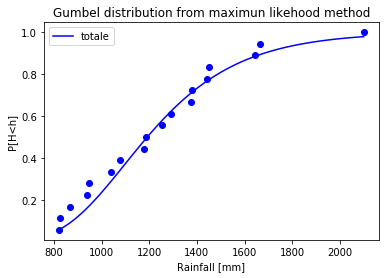

In [38]:
ax = gb.plot(color = ['blue'])
ax.plot(datatot, ecdf(datatot), 'o', c = 'blue', label = 'totale')
ax.set_xlabel('Rainfall [mm]')
ax.set_ylabel('P[H<h]')
ax.set_title('Gumbel distribution from maximun likehood method')
plt.show()